<a href="https://colab.research.google.com/github/Jstrykow/BenchMARL/blob/main/Confidence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorboard

In [3]:
!pip install gymnasium
#!pip install nasim[all]
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 842.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [4]:
!git clone https://github.com/Jstrykow/NetworkAttackSimulator.git
%cd NetworkAttackSimulator
!pip install .
%cd /content/


Cloning into 'NetworkAttackSimulator'...
remote: Enumerating objects: 2109, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 2109 (delta 64), reused 50 (delta 50), pack-reused 2017 (from 3)
Receiving objects: 100% (2109/2109), 12.79 MiB | 9.03 MiB/s, done.
Resolving deltas: 100% (1415/1415), done.
/content/NetworkAttackSimulator
Processing /content/NetworkAttackSimulator
  Preparing metadata (setup.py) ... done
  Created wheel for nasim: filename=nasim-0.12.0-py3-none-any.whl size=78137 sha256=abc9f038a8eeb83d9f07185281aad34a7eb7762b9c66ed7c81a3a2afafe23565
  Stored in directory: /tmp/pip-ephem-wheel-cache-a7xa60g3/wheels/25/02/0e/b1ab321ef995184ebcb743584e6df93783dbe4ce56c0872097
Successfully built nasim
/content


#result

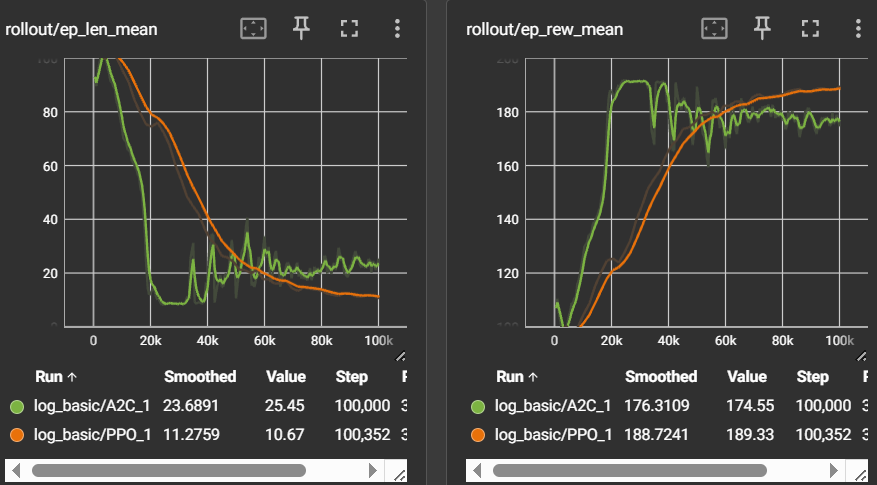

# Tensorboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir "/content/logs"

# **Utils**

In [7]:
import os
from stable_baselines3.common.callbacks import BaseCallback
import gymnasium
from stable_baselines3 import DQN, A2C, PPO
import numpy as np

class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        #env.render()
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
        return True

In [36]:
# scenario visualization
import os
from stable_baselines3.common.callbacks import BaseCallback
import gymnasium
from stable_baselines3 import DQN, A2C, PPO
import numpy as np
import matplotlib.pyplot as plt
import nasim
def run_episode(env, model):
  obs, _ = env.reset()
  env.render()
  action, _ = model.predict(obs)
  temp = []
  actions = []
  for episode in range(1):
      obs, _ = env.reset()
      done = False
      total_reward = 0
      while not done:
          action, _ = model.predict(obs)
          current_action = action
          print(f"step: {len(temp)}")
          env.render_action(int(action))
          actions.append(int(current_action))
          state = env.current_state
          obs, reward, done, epis, info = env.step(action)
          env.render()
          total_reward += reward
          temp.append((env.current_state, current_action, total_reward, done))
      #print('Total Reward for episode {} is {}'.format(episode, total_reward))
  return actions

# Tiny

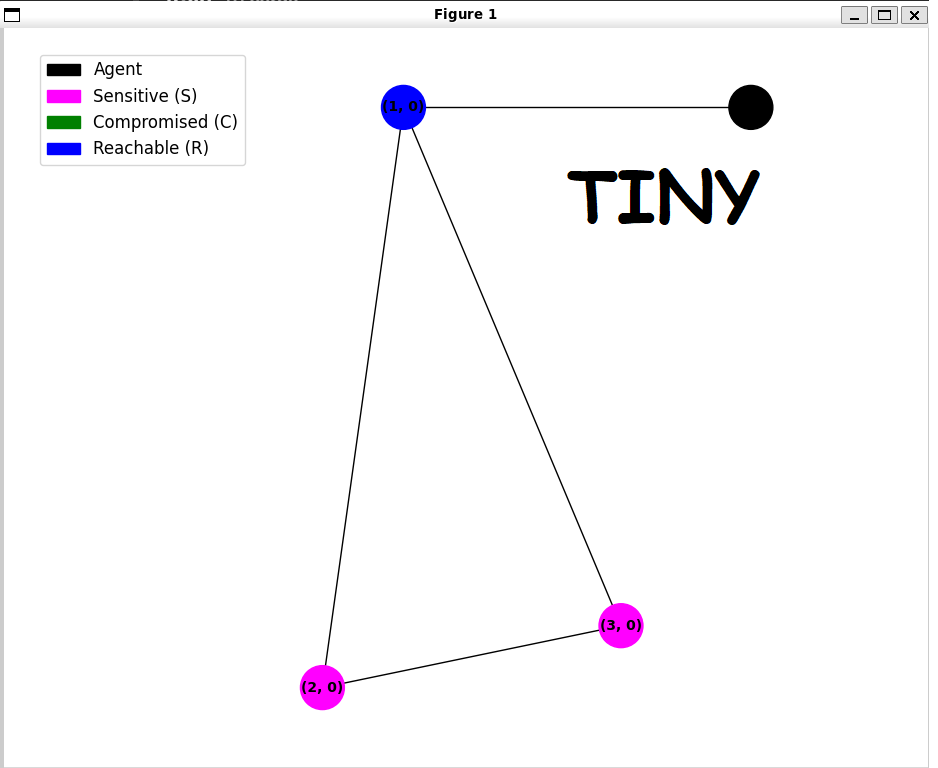

https://github.com/Jjschwartz/NetworkAttackSimulator/blob/master/nasim/scenarios/benchmark/tiny.yaml

In [24]:
CHECKPOINT_DIR = f'./train/train_basic_A2C'
LOG_DIR = f'./logs/log_basic'
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)
env = gymnasium.make("nasim:TinyPO-v0", render_mode="human")
model = A2C("MlpPolicy", env,verbose=1,  seed = 1, tensorboard_log=LOG_DIR, learning_rate=0.0007)
model.learn(total_timesteps=100000, callback=callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/log_basic/A2C_1
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 93       |
|    ep_rew_mean        | 107      |
| time/                 |          |
|    fps                | 450      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -2.81    |
|    explained_variance | -5.07    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -8.36    |
|    value_loss         | 17.5     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 89.5     |
|    ep_rew_mean        | 111      |
| time/                 |          |
|    fps                | 468      |
|    iterations      

In [25]:
CHECKPOINT_DIR = f'./train/train_basic_PPO'
LOG_DIR = f'./logs/log_basic'
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)
env = gymnasium.make("nasim:TinyPO-v0", render_mode="human")
model = PPO("MlpPolicy", env,verbose=1,  seed = 1, tensorboard_log=LOG_DIR, learning_rate=0.0001, batch_size = 64)
model.learn(total_timesteps=100000, callback=callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/log_basic/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 102      |
|    ep_rew_mean     | 97.9     |
| time/              |          |
|    fps             | 1016     |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 99.5        |
|    ep_rew_mean          | 100         |
| time/                   |             |
|    fps                  | 725         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.001605616 |
|    clip_fraction        | 0.00137     |
|    clip_range           | 

In [37]:
# uncomment to show untrain model
#model = A2C.load('/content/train/train_basic_A2C/best_model_10000.zip')

model = A2C.load('/content/train/train_basic_A2C/best_model_100000.zip')

env = nasim.load("NetworkAttackSimulator/nasim/scenarios/benchmark/tiny.yaml", render_mode="human")
actions = run_episode(env, model)

for action in actions:
  env.render_action(int(action))


Observation:
+---------+------------------+------------------+-----------------+
| Success | Connection Error | Permission Error | Undefined Error |
+---------+------------------+------------------+-----------------+
|  False  |      False       |      False       |      False      |
+---------+------------------+------------------+-----------------+
+----------------------------+-------------+-----------+------------+-------+-----------------+--------+-------+-------+--------+
|          Address           | Compromised | Reachable | Discovered | Value | Discovery Value | Access | linux |  ssh  | tomcat |
+----------------------------+-------------+-----------+------------+-------+-----------------+--------+-------+-------+--------+
| (np.int64(1), np.int64(0)) |    False    |    True   |    True    |  0.0  |       0.0       |  0.0   | False | False | False  |
| (np.int64(0), np.int64(0)) |    False    |   False   |   False    |  0.0  |       0.0       |  0.0   | False | False | False 

In [38]:
# uncomment to show untrain model
#model = PPO.load('/content/train/train_basic_PPO/best_model_10000.zip')

model = PPO.load('/content/train/train_basic_PPO/best_model_100000.zip')

env = nasim.load("NetworkAttackSimulator/nasim/scenarios/benchmark/tiny.yaml", render_mode="human")
actions = run_episode(env, model)

for action in actions:
  env.render_action(int(action))


Observation:
+---------+------------------+------------------+-----------------+
| Success | Connection Error | Permission Error | Undefined Error |
+---------+------------------+------------------+-----------------+
|  False  |      False       |      False       |      False      |
+---------+------------------+------------------+-----------------+
+----------------------------+-------------+-----------+------------+-------+-----------------+--------+-------+-------+--------+
|          Address           | Compromised | Reachable | Discovered | Value | Discovery Value | Access | linux |  ssh  | tomcat |
+----------------------------+-------------+-----------+------------+-------+-----------------+--------+-------+-------+--------+
| (np.int64(1), np.int64(0)) |    False    |    True   |    True    |  0.0  |       0.0       |  0.0   | False | False | False  |
| (np.int64(0), np.int64(0)) |    False    |   False   |   False    |  0.0  |       0.0       |  0.0   | False | False | False 

#Small

In [43]:
# CHECKPOINT_DIR = f'./train/train_small_A2C'
# LOG_DIR = f'./logs/log_small'
# callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)
# env = gymnasium.make("nasim:Small-v0", render_mode="human")
# model = A2C("MlpPolicy", env,verbose=1,  seed = 1, tensorboard_log=LOG_DIR, learning_rate=0.0007)
# model.learn(total_timesteps=200000, callback=callback)

In [51]:
# CHECKPOINT_DIR = f'./train/train_small_PPO_lr_1-e4'
# LOG_DIR = f'./logs/log_small_lr_1-e4'
# callback = TrainAndLoggingCallback(check_freq=20000, save_path=CHECKPOINT_DIR)
# env = gymnasium.make("nasim:SmallPO-v0", render_mode="human")
# model = PPO("MlpPolicy", env,verbose=1,  seed = 1, tensorboard_log=LOG_DIR, learning_rate=0.0001, batch_size = 64)
# model.learn(total_timesteps=200000, callback=callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/log_small_lr_1-e4/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 578      |
|    ep_rew_mean     | -580     |
| time/              |          |
|    fps             | 838      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 570          |
|    ep_rew_mean          | -562         |
| time/                   |              |
|    fps                  | 487          |
|    iterations           | 2            |
|    time_elapsed         | 8            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0002908054 |
|    clip_fraction        | 0.000391     |
|    cli

KeyboardInterrupt: 

In [ ]:
CHECKPOINT_DIR = f'./train/train_small_PPO_lr_1-e3'
LOG_DIR = f'./logs/log_small_lr_1-e3'
callback = TrainAndLoggingCallback(check_freq=20000, save_path=CHECKPOINT_DIR)
env = gymnasium.make("nasim:SmallPO-v0", render_mode="human")
model = PPO("MlpPolicy", env,verbose=1,  seed = 1, tensorboard_log=LOG_DIR, learning_rate=0.001, batch_size = 64)
model.learn(total_timesteps=200000, callback=callback)

In [49]:
#model = PPO.load('train/train_basic/best_model_10000.zip')
model = PPO.load('/content/train/train_small_PPO/best_model_200000.zip')

#env = gymnasium.make("nasim:TinyPO-v0", render_mode="human")
env = nasim.load("NetworkAttackSimulator/nasim/scenarios/benchmark/small.yaml", render_mode="human")
actions = run_episode(env, model)

for action in actions:
  env.render_action(int(action))

Observation:
+---------+------------------+------------------+-----------------+
| Success | Connection Error | Permission Error | Undefined Error |
+---------+------------------+------------------+-----------------+
|  False  |      False       |      False       |      False      |
+---------+------------------+------------------+-----------------+
+----------------------------+-------------+-----------+------------+-------+-----------------+--------+-------+---------+-------+-------+-------+--------+---------+
|          Address           | Compromised | Reachable | Discovered | Value | Discovery Value | Access | linux | windows |  ssh  |  ftp  |  http | tomcat | daclsvc |
+----------------------------+-------------+-----------+------------+-------+-----------------+--------+-------+---------+-------+-------+-------+--------+---------+
| (np.int64(1), np.int64(0)) |    False    |    True   |    True    |  0.0  |       0.0       |  0.0   | False |  False  | False | False | False | Fa

# Medium

In [18]:
CHECKPOINT_DIR = f'./train/train_medium_PPO'
LOG_DIR = f'./logs/log_medium'
callback = TrainAndLoggingCallback(check_freq=20000, save_path=CHECKPOINT_DIR)
env = gymnasium.make("nasim:MediumPO-v0", render_mode="human")
model = PPO("MlpPolicy", env,verbose=1,  seed = 1, tensorboard_log=LOG_DIR, learning_rate=0.001)
model.learn(total_timesteps=200000, callback=callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/log_medium/PPO_4
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.7e+03   |
|    ep_rew_mean     | -2.33e+03 |
| time/              |           |
|    fps             | 1000      |
|    iterations      | 1         |
|    time_elapsed    | 2         |
|    total_timesteps | 2048      |
----------------------------------


KeyboardInterrupt: 

In [11]:
CHECKPOINT_DIR = f'./train/train_medium_PPO'
LOG_DIR = f'./logs/log_medium'
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)
env = gymnasium.make("nasim:MediumSingleSitePO-v0", render_mode="human")
model = PPO("MlpPolicy", env,verbose=1,  seed = 1, tensorboard_log=LOG_DIR, learning_rate=0.0001)
model.learn(total_timesteps=200000, callback=callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/log_medium/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 657      |
|    ep_rew_mean     | -803     |
| time/              |          |
|    fps             | 885      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 582           |
|    ep_rew_mean          | -685          |
| time/                   |               |
|    fps                  | 583           |
|    iterations           | 2             |
|    time_elapsed         | 7             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00014950745 |
|    clip_fraction        | 4.88e-05      |
|  

In [23]:
#model = PPO.load('train/train_basic/best_model_10000.zip')
model = PPO.load('/content/train/train_medium_PPO/best_model_120000.zip')

#env = gymnasium.make("nasim:TinyPO-v0", render_mode="human")
env = nasim.load("NetworkAttackSimulator/nasim/scenarios/benchmark/medium-single-site.yaml", render_mode="human")
run_episode(env, model)

Observation:
+---------+------------------+------------------+-----------------+
| Success | Connection Error | Permission Error | Undefined Error |
+---------+------------------+------------------+-----------------+
|  False  |      False       |      False       |      False      |
+---------+------------------+------------------+-----------------+
+-----------------------------+-------------+-----------+------------+-------+-----------------+--------+-------+---------+-------+-------+-------+-------+-------+--------+---------+---------+
|           Address           | Compromised | Reachable | Discovered | Value | Discovery Value | Access | linux | windows |  ssh  |  ftp  |  http | samba |  smtp | tomcat | daclsvc | schtask |
+-----------------------------+-------------+-----------+------------+-------+-----------------+--------+-------+---------+-------+-------+-------+-------+-------+--------+---------+---------+
|  (np.int64(1), np.int64(0)) |    False    |    True   |    True   

[100, 47, 44, 42, 100, 105, 105, 44, 182, 44, 116, 100, 105, 105, 100, 47]